
# Modelo de clasificación


Para ejemplificar la aplicación de un modelo de clasificación se emplea la base pública “**Titanic: Machine Learning from Disaster**” del sitio web https://www.kaggle.com/, la cual es usada ampliamente por los usuarios de análisis de datos para probar diversas técnicas y algoritmos de predicción.

La base cuenta con información de los 2224 pasajeros y tripulación del transatlántico británico RSM Titanic, el cual se hundió el 15 de abril de 1912, donde fallecieron 1502 personas.

Dependiendo de las características de las personas como sex(sexo), Age(edad), Clase-socioeconómica entre otras, el objetivo es generar un **modelo de clasificación** para determinar cuáles personas sobreviven y cuáles fallecen en función de estas variables predictoras.


# Preprocesamiento de los datos

El preprocesamiento de los datos para que estén listo para su modelación incluye los siguientes pasos:



1.   Importación de las bases.
2.   Exploración preliminar de la información.
3.   Tratamiento de datos faltantes.
4.   Análisis univariado de la respuesta y análisis bivariado respecto a los predictores.
5.   Ingeniería y transformación de variables.
6.   Eliminación de algunas variables predictoras.
7.   Análisis de datos atípicos.
8.   Generación de conjunto de entrenamiento y validación

Veamos a continuación cómo se realizan estos pasos a los datos del titanic empleado diversas librerías de python.



## 1) Importación de los datos

Para importar los datos se tiene primero que descargar de la página de kaggle, previamente un registro como usuario.

Los datos se tienen que guarda en la carpeta de "Colab Notebooks".




Para poder acceder a los datos es necesario primero montar el drive en google colab, para lo cual se corre el siguiente código:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


Una vez hecha la conexión se busca importar la información. Para esto se usa la biblioteca de **pandas** la cual permite trabajar con marcos de datos:

Un **marco de datos**, también conocido como base de datos, es un *conjunto de datos organizado en renglones y columnas* de tal manera que ***cada columna*** corresponde a una variable o característica de interés registrada para cada elemento observado y ***cada renglón*** contiene información de las diferentes variables sobre cada uno de los elementos o unidades.

Las columnas o variables pueden ser de diferentes tipos; sin embargo, ***todos los elementos de una misma columna deben tener el mismo tipo***, ya sea numérico, lógico o de caracteres.

In [ ]:
#Se carga la librería pandas y numpy
import pandas as pd
import numpy as np

Se usa la función `read_csv()` del paquete **pandas** para cargar los datos.



In [ ]:
#Se guarda en la dirección donde está alojado el archivo en un objeto tipo caracter
datos_titanic = "/content/drive/MyDrive/Colab Notebooks/Datos titanic/train.csv"

df_titanic = pd.read_csv(datos_titanic)

Puedo ***visualizar*** el marco de los datos si pongo en una celda el nombre del objeto que contiene el data.frame

In [ ]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2) Exploración preliminar de la información

Una vez cargados lo datos es necesario hacer una ***inspección inicial*** para conocer ***características de la base*** como por ejemplo el **número de columnas**, **tipos de campos**, **registros con datos faltantes**, y obtener algunos **estadísticos básicos**  para de las *variables continuas* como **media, mediana, moda, mínimo, máximo,** y para *variables discretas:* **frecuencias relativas**.

Esta información será un **punto de partida** para el tratamiento posterior, ya que nos dará un panorama general de la estructura de los datos.




Para saber **cuántas filas y columnas** se puede usar el atributo `shape`

In [ ]:
df_titanic.shape

(891, 12)

Se tiene un dataframe de 891 filas y 12 columas

Para conocer el **nombre de las columnas** se puede listar el atributo `columns`

In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

La información anterior se puede también obtener directamente del método `info()`

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Para obtener **estadísticas descriptivas**, se usa el método `describe()`.

Las e**stadísticas descriptivas** incluyen las que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.

In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Seleccionar columnas de tipo 'object'
df_columnas_object = df_titanic.select_dtypes(include='object')

# Obtener el número de valores únicos para cada columna tipo object
df_resumen = df_columnas_object.nunique().reset_index()
df_resumen.columns = ['Variable', 'Valores Únicos']

# Mostrar el resumen
print(df_resumen)

   Variable  Valores Únicos
0      Name             891
1       Sex               2
2    Ticket             681
3     Cabin             147
4  Embarked               3


En este punto es importante identificar si existen variables que **no dan información** para la generación de los modelos de predicción, l**as cuales deben ser removidas** antes de continuar el análisis de los datos, ya que evitan análisis y tiempo de computo innecesarios.

 Este tipo de variables se conoce como **no informativas**, y generalmente son campos para los cuales resulta evidente su nula relación con la variable de respuesta.

  Como ejemplo se tiene algún campo relacionado con **“llaves”** para el manejo de bases de datos, o algún identificador de los registros de la base.



---
Con el método drop podemos especificar filas o columnas a eliminar.


In [ ]:
print(df_titanic.shape)
df_titanic.drop(['PassengerId'], axis = 'columns', inplace=True)
print(df_titanic.shape)

(891, 12)
(891, 11)


## 3) Ingeniería de variables

Una de las variables que se pueden generar es el del título de tratamiento de cortesía, el cual se puede obtener de la variable **Name**, a través del siguiente código:

In [ ]:
#Extrae todos los titulos que tienen un Mr., Mrs. Miss.
df_titanic['Title'] = df_titanic['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# Quita espacios antes y después
df_titanic['Title'] = df_titanic['Title'].str.strip()

#Para mostrar los casos
Conteo_Title = df_titanic['Title'].value_counts()
print(Conteo_Title)

# Se crea una función para generar solamente 5 niveles
def map_titles(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    else:
        return 'Rare Title'

# Se aplica la función
df_titanic['Title'] = df_titanic['Title'].apply(map_titles)

#Se muestra el resultado
print("Resultado de generar variable con 5 niveles:")
print(df_titanic['Title'].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64
Resultado de generar variable con 5 niveles:
Title
Mr            517
Miss          182
Mrs           125
Master         40
Rare Title     27
Name: count, dtype: int64


Para revisar cúales son las columna que tienen datos faltantes se pueden usar dos métodos concatenados `dataframe.isnull().sum()`. Aunque previamente la variable ya se habia visto con describe(), cuantos no nulos tenía cada variable.

Una vez extraido el titulo e tratamiento de cortesíala variable **Name**, es recomendable eliminarla, pues tiene tantos niveles como nombres diferentes. ***Variables categóricas con muchos niveles***, resultan en problemas al momento de estimar modelos de aprendizaje estadístico.

In [ ]:
print(df_titanic.shape)
df_titanic.drop(['Name'], axis = 'columns', inplace=True)
df_titanic.shape

(891, 12)


(891, 11)

Además, ya hemos observado que la variable **Ticket** tiene algunas entradas duplicadas. Algunos pasajeros comparten el número de billete porque están juntos. Pueden tener una relación con un empleado o un servicio, como una asistenta o una niñera, o pueden ser amigos íntimos.

Podemos extraer información implícita de los valores duplicados en la variable **Ticket**  y crear una nueva variable para describirla. Aquí diseñamos la nueva variable "Companions" que describe el número de acompañantes o compañeros de viaje de cada individuo.

In [ ]:
# Crear una nueva columna 'Companions'
df_titanic['Companions'] = df_titanic.groupby('Ticket')['Ticket'].transform('count')
df_titanic['Companions']=df_titanic['Companions']-1

# Mostrar la distribución del número de acompañantes
df_titanic['Companions'].value_counts()

,count
Companions,
0,547
1,188
2,63
3,44
6,21
5,18
4,10


Una vez extraido el número de acompañantes de la variable **Ticket**, es recomendable eliminarla, pues tiene muchjos diferentes niveles

In [ ]:
print(df_titanic.shape)
df_titanic.drop(['Ticket'], axis = 'columns', inplace=True)
df_titanic.shape

(891, 12)


(891, 11)

## 4) Tratamiento de datos faltantes

Cuando se está trabajando con una base de datos es importante revisar si algunas **variables explicativas** tienen datos faltantes, pues esto puede afectar el ajuste de los **modelos estadísticos de aprendizaje**.

Si bien es cierto que algunos modelos pueden manejar esta circunstancia (como los*** modelos de árboles de decisión y sus extensiones***), generalmente es adecuado aplicar alguna de las siguientes alternativas.

(1) Si la cantidad de información es grande, y el **porcentaje de registros con datos faltantes es pequeño** (<5\%), se puede optar por quitarlos y trabajar con el subconjunto de datos completos.

(2) Sin embargo, a veces la base de datos no es tan extensa o se quiere aprovechar la información que aportan las demás variables por lo que en este caso se puede proceder a **imputar** los datos faltantes, esto es, ***rellenar los registros de los campos vacíos***.

In [ ]:
df_titanic.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2
Title,0


In [ ]:
#Si lo divido entre el número total de entradas obtengo la proporción de faltantes
df_titanic.isnull().sum()/df_titanic.shape[0]

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,0.771044
Embarked,0.002245
Title,0.000000


En el caso de la variable Cabin, se tiene una cantidad muy alta de valores ausentes 77%. Se considera que imputar estos valores introducirá más ruido al modelo que lo que puede ser útil, por lo que se decide quitar esta variable de la base.

In [ ]:
print(df_titanic.shape)
df_titanic.drop(['Cabin'], axis = 'columns', inplace=True)
df_titanic.shape

(891, 11)


(891, 10)

Se va a usar el paquete missForest() de R. Por tal motivo se carga el paquete rpy2 que permite usar código de R en Python

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Una vez cargado el paquete rpy2, hay dos formas de correr R en google colab.


1.   Usando el comando inicial %%R para posteriormente usar puro código de R en esa celda de código
2.   Empleando %R para combinar código Python y R en una celda de puro código Python.



Como ejemplo del primer caso se tiene:

In [ ]:
%%R
print("Hola mundo")
x <- c(78, 12, 23, 67)
y <- c(34, 23, 36, 45)
z <- x+y
print(z)


[1] "Hola mundo"
[1] 112  35  59 112


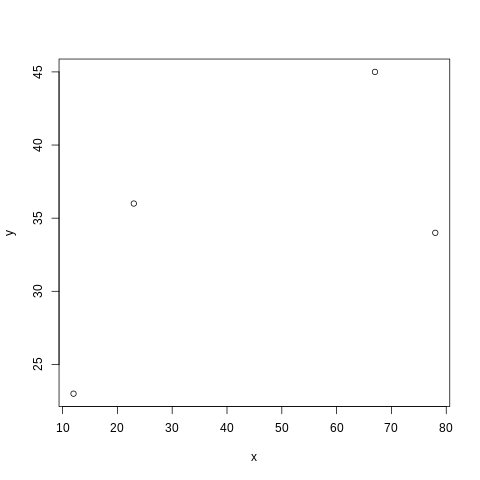

In [ ]:
%%R
plot(x,y)

Como en el segundo caso se tiene:


In [ ]:
a = 5
print("En python")
print(type(5))

%R print("En R:")
%R print(class(x))
%R w <- x - y
%R print(mean(w))

print("En python de nuevo:")
b=10
c = a+b
print(c)


En python
<class 'int'>
[1] "En R:"
[1] "numeric"
[1] 10.5
En python de nuevo:
15


Instalar paquetes en R. Recomendablecrear una carpeta en el Drive. En este caso se llamó r-lib

In [ ]:
%%R
#El código está comentado porque el paquete ya está instalado
#lib_loc <- "/content/drive/MyDrive/r-lib"
#install.packages("missForest", lib = lib_loc)

NULL


Para cargar paqueterías hay que especificar la dirección donde están guardadas:

In [ ]:
%%R
lib_loc <- "/content/drive/MyDrive/r-lib"
library(missForest, lib.loc = lib_loc)

In [ ]:
#Guardo el dataframe en un archivo csv
df_titanic.to_csv('df_titanic.csv', index=False)

In [ ]:
#Leo el documento csv directamente desde R
%%R
df_titanic <- read.csv('df_titanic.csv')

In [ ]:
#Pasar el dataframe de python a R:
#%R -i df_titanic
%R print("Tipo de objeto:")
%R print(class(df_titanic))
%R print("Imprimir las primeras 5 filas:")
%R print(head(df_titanic,3))
%R print("Tipos de datos:")
%R print(str(df_titanic))

[1] "Tipo de objeto:"
[1] "data.frame"
[1] "Imprimir las primeras 5 filas:"
  Survived Pclass    Sex Age SibSp Parch    Fare Embarked Title Companions
1        0      3   male  22     1     0  7.2500        S    Mr          0
2        1      1 female  38     1     0 71.2833        C   Mrs          0
3        1      3 female  26     0     0  7.9250        S  Miss          0
[1] "Tipos de datos:"
'data.frame':	891 obs. of  10 variables:
 $ Survived  : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass    : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex       : chr  "male" "female" "female" "female" ...
 $ Age       : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp     : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch     : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare      : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked  : chr  "S" "C" "S" "S" ...
 $ Title     : chr  "Mr" "Mrs" "Miss" "Mrs" ...
 $ Companions: int  0 0 0 1 0 0 0 3 2 1 ...
NULL


In [ ]:
%%R
#Función que convierte character a tipo factor
chr_to_factor <- function(col) {
    if(is.character(col))
    { as.factor(col) }
    else { col }
}
#Aplico la función al dataframe con lapply
ls_titanic <- lapply(df_titanic, chr_to_factor)
#Convertimos la lista a data.frame
df_titanic <- data.frame(ls_titanic)
str(df_titanic)

'data.frame':	891 obs. of  10 variables:
 $ Survived  : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass    : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex       : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age       : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp     : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch     : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare      : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked  : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ Title     : Factor w/ 5 levels "Master","Miss",..: 3 4 2 4 3 3 3 1 4 4 ...
 $ Companions: int  0 0 0 1 0 0 0 3 2 1 ...


In [ ]:
%%R
#Valores faltantes
print("Dataframe original")
print(colSums(is.na(df_titanic)))

#Se hace la imputación y se guarda el data.frame con otro nombre
titanic_imp_rf <- missForest(df_titanic)

#Convertimos el objeto a un data.frame la matriz titanic_imp_rf$ximp
df_titanic_imp_rf <- data.frame(titanic_imp_rf$ximp)

#Valores faltantes
print("Datos imputados:")
print(colSums(is.na(df_titanic_imp_rf)))


[1] "Dataframe original"
  Survived     Pclass        Sex        Age      SibSp      Parch       Fare 
         0          0          0        177          0          0          0 
  Embarked      Title Companions 
         0          0          0 
[1] "Datos imputados:"
  Survived     Pclass        Sex        Age      SibSp      Parch       Fare 
         0          0          0          0          0          0          0 
  Embarked      Title Companions 
         0          0          0 


In [ ]:
#Pasar el objeto de R a Python
%R -o df_titanic_imp_rf
df_titanic_imp_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int32   
 1   Pclass      891 non-null    int32   
 2   Sex         891 non-null    category
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int32   
 5   Parch       891 non-null    int32   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    category
 8   Title       891 non-null    category
 9   Companions  891 non-null    int32   
dtypes: category(3), float64(2), int32(5)
memory usage: 41.4+ KB


## 5) Anális de la respuesta y su relación con cada predictor

Para conocer la distribución de la variable de respuesta, que es Survivied, se puede generar una ***gráfica de frecuencia relativas*** o realizar una ***gráfica de barras***.

Para la tabla de frecuencias relativas se usa el método `value_counts()` aplicado al objeto Pandas con el argumento `normalize=TRUE`

In [ ]:
#Se genera un objeto tipo pandas-series
Proporciones_Survived = df_titanic_imp_rf['Survived'].value_counts(normalize=True)

#Se crea un marco de datos Pandas a partir del objeto pandas-series
pd.DataFrame(Proporciones_Survived)

,proportion
Survived,
0,0.616162
1,0.383838


Se crea una gráfica de barras para las proporciones. Se hace uso de la librería **matplotlib** y de la función `bar()`.

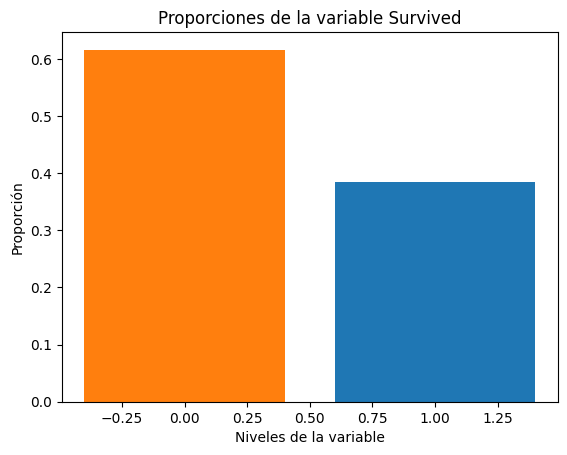

In [ ]:
#Paquete matplotlib
import matplotlib.pyplot as plt

# Crear una gráfica de barras con función plt.bar()
plt.bar(x=Proporciones_Survived.index,
        height=Proporciones_Survived.values,
        color=['tab:orange', 'tab:blue'])

# Configurar etiquetas y título
plt.xlabel('Niveles de la variable')
plt.ylabel('Proporción')
plt.title('Proporciones de la variable Survived')

# Mostrar la gráfica
plt.show()

Análisis bivariado entre Survived y otras variables predictoras:

**1) Survived vs Sex**

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815
Se  muestra la gráfica:


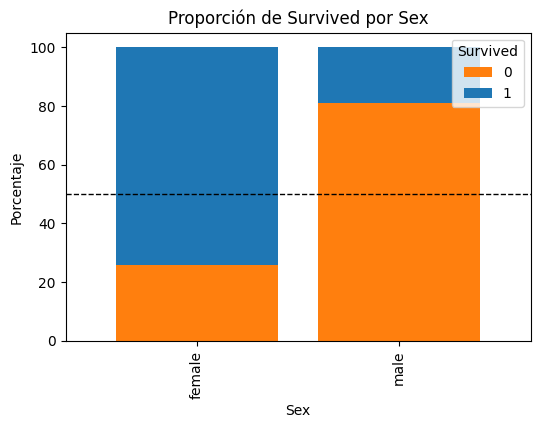

In [ ]:
# Crear un DataFrame resumen con la proporción de '0' y '1'
# para cada nivel de 'Sex'
df_Survived_vs_Sex = pd.crosstab(df_titanic_imp_rf['Sex'],
                                 df_titanic_imp_rf['Survived'],
                                 normalize='index') * 100
print(df_Survived_vs_Sex)

# Graficar la barra apilada
ax = df_Survived_vs_Sex.plot(kind='bar', stacked=True,
                             color=['tab:orange', 'tab:blue'],
                             width=0.8, figsize=(6, 4))

# Añadir etiquetas y título
plt.xlabel('Sex')
plt.ylabel('Porcentaje')
plt.title('Proporción de Survived por Sex')
plt.legend(title='Survived', loc='upper right')

# Añadir la línea que divide en dos barras
ax.axhline(50, color='black', linestyle='--', linewidth=1)

# Mostrar la gráfica
print("Se  muestra la gráfica:")
plt.show()

Survived            0          1
Title                           
Master      42.500000  57.500000
Miss        30.219780  69.780220
Mr          84.332689  15.667311
Mrs         20.800000  79.200000
Rare Title  55.555556  44.444444
Se  muestra la gráfica:


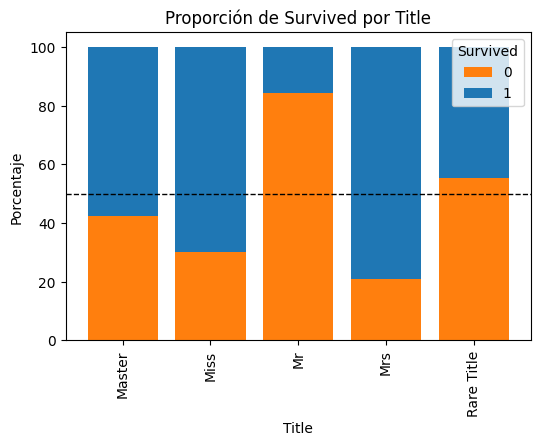

In [ ]:
# Crear un DataFrame resumen con la proporción de '0' y '1'
# para cada nivel de Title
df_Survived_vs_Title = pd.crosstab(df_titanic_imp_rf['Title'],
                                   df_titanic_imp_rf['Survived'],
                                   normalize='index') * 100
print(df_Survived_vs_Title)


# Graficar la barra apilada
ax = df_Survived_vs_Title.plot(kind='bar', stacked=True,
                               color=['tab:orange', 'tab:blue'],
                               width=0.8, figsize=(6, 4))

# Añadir etiquetas y título
plt.xlabel('Title')
plt.ylabel('Porcentaje')
plt.title('Proporción de Survived por Title')
plt.legend(title='Survived', loc='upper right')

# Añadir la línea que divide en dos barras
ax.axhline(50, color='black', linestyle='--', linewidth=1)

# Mostrar la gráfica
print("Se  muestra la gráfica:")
plt.show()

Survived          0           1
Embarked                       
           0.000000  100.000000
C         44.642857   55.357143
Q         61.038961   38.961039
S         66.304348   33.695652
Se  muestra la gráfica:


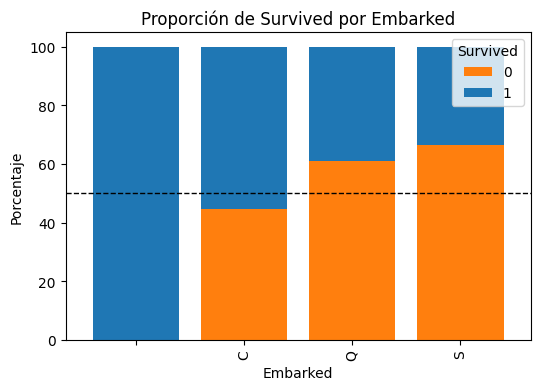

In [ ]:
# Crear un DataFrame resumen con la proporción de '0' y '1'
# para cada nivel de Embarked
df_Survived_vs_Embarked = pd.crosstab(df_titanic_imp_rf['Embarked'],
                                   df_titanic_imp_rf['Survived'],
                                   normalize='index') * 100
print(df_Survived_vs_Embarked)


# Graficar la barra apilada
ax = df_Survived_vs_Embarked.plot(kind='bar', stacked=True,
                               color=['tab:orange', 'tab:blue'],
                               width=0.8, figsize=(6, 4))

# Añadir etiquetas y título
plt.xlabel('Embarked')
plt.ylabel('Porcentaje')
plt.title('Proporción de Survived por Embarked')
plt.legend(title='Survived', loc='upper right')

# Añadir la línea que divide en dos barras
ax.axhline(50, color='black', linestyle='--', linewidth=1)

# Mostrar la gráfica
print("Se  muestra la gráfica:")
plt.show()

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253
Se  muestra la gráfica:


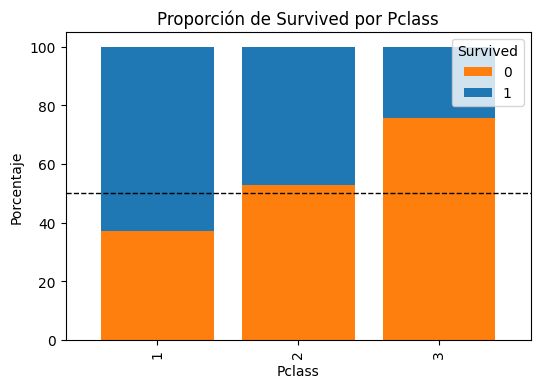

In [ ]:
# Crear un DataFrame resumen con la proporción de '0' y '1'
# para cada nivel de Embarked
df_Survived_vs_Pclass = pd.crosstab(df_titanic_imp_rf['Pclass'],
                                   df_titanic_imp_rf['Survived'],
                                   normalize='index') * 100
print(df_Survived_vs_Pclass)


# Graficar la barra apilada
ax = df_Survived_vs_Pclass.plot(kind='bar', stacked=True,
                               color=['tab:orange', 'tab:blue'],
                               width=0.8, figsize=(6, 4))

# Añadir etiquetas y título
plt.xlabel('Pclass')
plt.ylabel('Porcentaje')
plt.title('Proporción de Survived por Pclass')
plt.legend(title='Survived', loc='upper right')

# Añadir la línea que divide en dos barras
ax.axhline(50, color='black', linestyle='--', linewidth=1)

# Mostrar la gráfica
print("Se  muestra la gráfica:")
plt.show()

Survived              0          1
Age_Category                      
(-1.0, 19.0]  52.941176  47.058824
(19.0, 26.0]  62.500000  37.500000
(26.0, 31.0]  67.816092  32.183908
(31.0, 40.0]  61.413043  38.586957
(40.0, 80.0]  64.117647  35.882353
Se  muestra la gráfica:


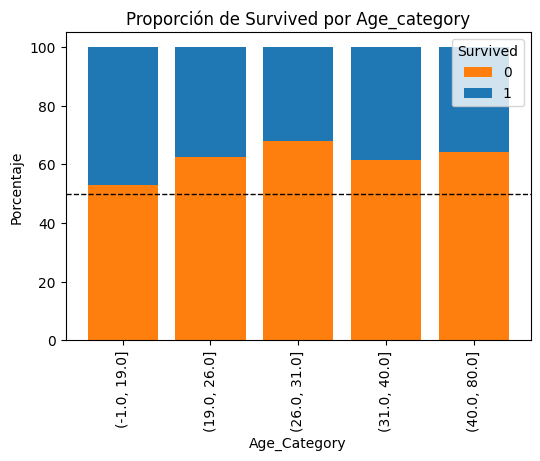

In [ ]:
#'Age' es la columna que se desea discretizar
num_bins = 5  # Número de intervalos deseados

#Hacer las particiones con la función qcut()
bins = pd.qcut(df_titanic_imp_rf['Age'], q=num_bins,
               precision=0, duplicates='drop')

#Se transforma el objeto pandas Series a tipo category para extraer las etiquetas
#en las que se discretizó la variable numérica
bins_categorical = bins.astype('category')
Age_categories = bins_categorical.cat.categories

#Se hace la partición de las 5 categorías y se guarda en la variable 'Age_Category'
df_titanic_imp_rf['Age_Category'] = pd.qcut(df_titanic_imp_rf['Age'],
                                            q=num_bins, labels=Age_categories,
                                            precision=0, duplicates='drop')

df_Survived_vs_Age = pd.crosstab(df_titanic_imp_rf['Age_Category'],
                                 df_titanic_imp_rf['Survived'],
                                 normalize='index') * 100
print(df_Survived_vs_Age)

# Graficar la barra apilada
ax = df_Survived_vs_Age.plot(kind='bar',
                             stacked=True,
                             color=['tab:orange', 'tab:blue'],
                             width=0.8, figsize=(6, 4))

# Añadir etiquetas y título
plt.xlabel('Age_Category')
plt.ylabel('Porcentaje')
plt.title('Proporción de Survived por Age_category')
plt.legend(title='Survived', loc='upper right')

# Añadir la línea que divide en dos barras
ax.axhline(50, color='black', linestyle='--', linewidth=1)

# Mostrar la gráfica
print("Se  muestra la gráfica:")
plt.show()

In [ ]:
df_titanic_imp_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int32   
 1   Pclass        891 non-null    int32   
 2   Sex           891 non-null    category
 3   Age           891 non-null    float64 
 4   SibSp         891 non-null    int32   
 5   Parch         891 non-null    int32   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    category
 8   Title         891 non-null    category
 9   Companions    891 non-null    int32   
 10  Age_Category  891 non-null    category
dtypes: category(4), float64(2), int32(5)
memory usage: 42.5+ KB


In [ ]:
#Se eliminan todas las variables categóricas que se discretizaron
#Sólo se usaron con fines exploratorios

df_titanic_imp_rf.drop(['Age_Category'], axis = 'columns', inplace=True)


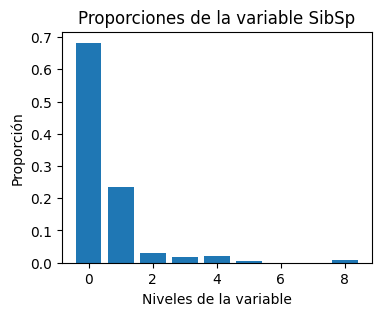

In [ ]:
#Se genera un objeto tipo pandas-series
Proporciones_SibSp = df_titanic_imp_rf['SibSp'].value_counts(normalize=True)

#Se crea un marco de datos Pandas a partir del objeto pandas-series
pd.DataFrame(Proporciones_SibSp)

#Tamaño de la imagen
plt.figure(figsize=(4,3))

# Crear una gráfica de barras con función plt.bar()
plt.bar(x=Proporciones_SibSp.index,
        height=Proporciones_SibSp.values)

# Configurar etiquetas y título
plt.xlabel('Niveles de la variable')
plt.ylabel('Proporción')
plt.title('Proporciones de la variable SibSp')


# Mostrar la gráfica
plt.show()

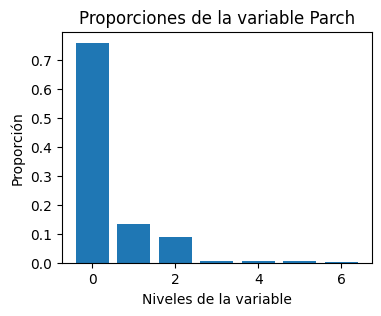

In [ ]:
#Se genera un objeto tipo pandas-series
Proporciones_Parch = df_titanic_imp_rf['Parch'].value_counts(normalize=True)

#Se crea un marco de datos Pandas a partir del objeto pandas-series
pd.DataFrame(Proporciones_Parch)

#Tamaño de la imagen
plt.figure(figsize=(4,3))

# Crear una gráfica de barras con función plt.bar()
plt.bar(x=Proporciones_Parch.index,
        height=Proporciones_Parch.values)

# Configurar etiquetas y título
plt.xlabel('Niveles de la variable')
plt.ylabel('Proporción')
plt.title('Proporciones de la variable Parch')

# Mostrar la gráfica
plt.show()

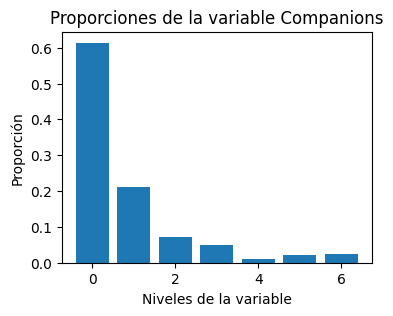

In [ ]:
#Se genera un objeto tipo pandas-series
Proporciones_Companions = df_titanic_imp_rf['Companions'].value_counts(normalize=True)

#Se crea un marco de datos Pandas a partir del objeto pandas-series
pd.DataFrame(Proporciones_Companions)

#Tamaño de la imagen
plt.figure(figsize=(4,3))

# Crear una gráfica de barras con función plt.bar()
plt.bar(x=Proporciones_Companions.index,
        height=Proporciones_Companions.values)

# Configurar etiquetas y título
plt.xlabel('Niveles de la variable')
plt.ylabel('Proporción')
plt.title('Proporciones de la variable Companions')

# Mostrar la gráfica
plt.show()

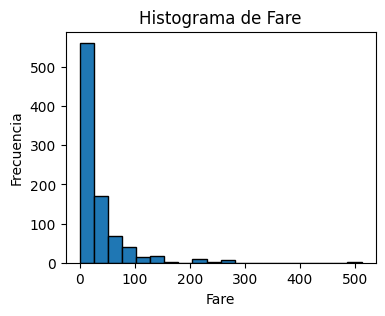

In [ ]:
# Histograma de Fare
plt.figure(figsize=(4,3))
plt.hist(df_titanic_imp_rf['Fare'], bins=20, color='tab:blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma de Fare')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

## 6) Datos atípicos

Los datos atípicos o irregulares son observaciones de algunas variables que poseen un comportamiento anormal o fuera de lo común.

El tratamiento de datos irregulares es importante pues la presencia de estos datos puede afectar el desempeño de algunos modelos predictivos, entre los que destacan: modelos lineales, modelos lineales generalizados y árboles de decisión (por mencionar algunos). Es importante mencionar que existen otros modelos como los modelos de bagging, bosques aleatorios o modelos de boosting que no se ven tan afectados por los datos atípicos.

Una vez seleccionado el método para determinar los datos atípicos o irregulares, es necesario imputar o modificar esos valores de una forma coherente. Para tal fin se puede usar el paquete en python **Feature-engine**.

Los limitadores de valores atípicos de Feature-engine limitan los valores máximos o mínimos de una variable a un valor arbitrario o derivado, empleando el **criterio de Tukey** o el **criterio de Hampel**.

Es nesario cargar la clase *Winsorizer*

Como no está por defecto en google colab, hay que instalalarlo con el comando pip.

Para usar pip en colab se tiene que poner antes un signo de !

In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
#Se importa la clase Winsorizer
from feature_engine.outliers import Winsorizer

#Se initializa el objeto que va a limitar los valores atípicos
capper = Winsorizer(capping_method='iqr',
                    tail='right',
                    fold=3,
                    variables=['Age', 'Fare'])

#Se hace el ajuste sobre los datos
capper.fit(df_titanic_imp_rf)

Winsorizer(capping_method='iqr', fold=3, variables=['Age', 'Fare'])

In [ ]:
#Imprimir los límites en un diccionario
print(capper.right_tail_caps_)

{np.str_('Age'): 86.74575646742124, np.str_('Fare'): 100.2688}


In [ ]:
#Mostrar los mínimos y máximos de las dos variables
df_titanic_imp_rf[['Age','Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.704637,32.204208
std,13.695217,49.693429
min,0.420000,0.000000
25%,21.000000,7.910400
50%,29.000000,14.454200
75%,37.436439,31.000000
max,80.000000,512.329200


In [ ]:
#Transformar los datos
df_titanic_imp_rf_outlier = capper.transform(df_titanic_imp_rf)

## 7) Eliminación de algunas variables predictoras


Existen algunas ventajas potenciales al remover predictores antes del modelado (Kunh & Johnshon 2013). Una razón evidente tiene que ver con la reducción en complejidad y el tiempo computacional del modelo al ajustarlo con menos variables.

Se van a ver dos situaciones donde resulta conveniente eliminar variables:

1.   Variables de varianza cero o casi cero
2.   Varibles altamente correlacionadas linealmente.


En el caso de variables de varianza cero o casi cero se tiene la clase `DropConstantFeatures` del paquete **Feature-engine**

In [ ]:
#Se carga la clase
from feature_engine.selection import DropConstantFeatures

#Se inicializa el objeto
#Se usa una tolerancia de 0.98 para eliminar
#las variables que muestren el mismo valor en el 98% de las observaciones.
dcf = DropConstantFeatures(tol=0.98)

#Se hace el ajuste sobre los datos para buscar las variables a eliminar
dcf.fit(df_titanic_imp_rf_outlier)



DropConstantFeatures(tol=0.98)

In [ ]:
#Para ver cuáles son la variables a eliminar se puede
#imnprimir el atributo features_to_drop (una lista)
dcf.features_to_drop_

[]

In [ ]:
#Transformar los datos
df_titanic_imp_rf_outlier_elimination = dcf.fit_transform(df_titanic_imp_rf_outlier)

Para inspeccionar visualmente la correlación entre variables se puede calcular la matriz de correlaciones de pearson con el método corr() de un objeto pandas dataframe

In [ ]:
#Se importa la clase find_or_check_numerical_variables para
#que regrese una lista con las variables numéricas
from feature_engine.variable_handling import find_numerical_variables

#Se crea una lista de variables numéricas
var_num = find_numerical_variables(df_titanic_imp_rf_outlier_elimination )
print(var_num)


[np.str_('Survived'), np.str_('Pclass'), np.str_('Age'), np.str_('SibSp'), np.str_('Parch'), np.str_('Fare'), np.str_('Companions')]


In [ ]:
# Aplica el método corr() al objeto pandas dataframe
# para obtener la matriz de correlaciones
corr_matrix=df_titanic_imp_rf_outlier_elimination[var_num].corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare,Companions
Survived,1.000000,-0.338481,-0.091702,-0.035322,0.081629,0.318097,0.038247
Pclass,-0.338481,1.000000,-0.390986,0.083081,0.018443,-0.702985,-0.002633
Age,-0.091702,-0.390986,1.000000,-0.309683,-0.213037,0.130504,-0.268257
SibSp,-0.035322,0.083081,-0.309683,1.000000,0.414838,0.269818,0.661622
Parch,0.081629,0.018443,-0.213037,0.414838,1.000000,0.263486,0.593076
Fare,0.318097,-0.702985,0.130504,0.269818,0.263486,1.000000,0.459298
Companions,0.038247,-0.002633,-0.268257,0.661622,0.593076,0.459298,1.000000


Para revisar las variables altamente correlacionadas se puede emplear la clase:


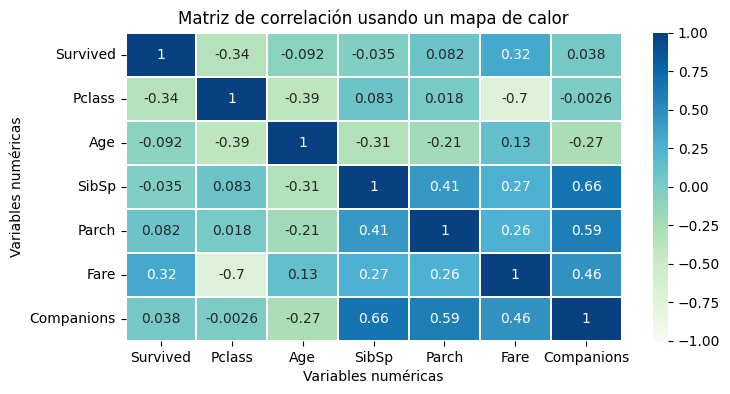

In [ ]:
# Se importa el paquete seaborn qué está orientada a la visualización
# de datos estadísticos
import seaborn as sns

# Gráfica de calor de la matriz de correlaciones
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu',
            linewidths=0.2, vmin=-1, vmax=1)
plt.xlabel('Variables numéricas')
plt.ylabel('Variables numéricas')
plt.title('Matriz de correlación usando un mapa de calor')
plt.show()

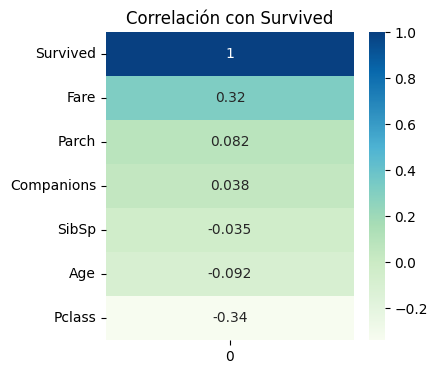

In [ ]:
# Crea una matriz de correlación con la respuesta
target = df_titanic_imp_rf_outlier_elimination['Survived']
corr_with_target = df_titanic_imp_rf_outlier_elimination[var_num].corrwith(target)

# Ordenar de forma descendente
corr_with_target = corr_with_target.sort_values(ascending=False)

# Mapa de calor
plt.figure(figsize=(4, 4))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlación con Survived')
plt.show()

Dado que se tiene una variable binaria, es mejor calcular la medida de concordancia: tau de kendall.

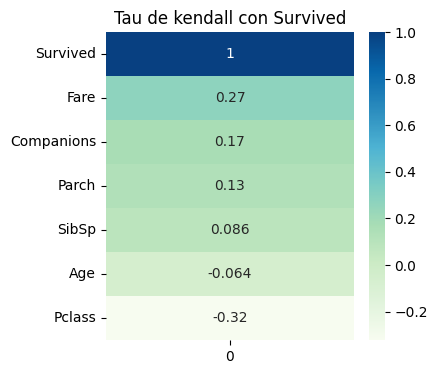

In [ ]:
# Crea una matriz de correlación con la respuesta usando al Tau de Kendall
target = df_titanic_imp_rf_outlier_elimination['Survived']
corr_with_target_k = df_titanic_imp_rf_outlier_elimination[var_num].corrwith(target,method='kendall')

# Ordenar de forma descendente
corr_with_target_k  = corr_with_target_k.sort_values(ascending=False)

# Mapa de calor
plt.figure(figsize=(4, 4))
sns.heatmap(corr_with_target_k.to_frame(), cmap='GnBu', annot=True)
plt.title('Tau de kendall con Survived')
plt.show()